![Global Internet Banner](banner_image.png)

# Internet: A Global Phenomenon

This dataset contains information on internet access around the world.

The workspace is set up with two CSV files containing information on global internet access for years ranging from 1990 to 2020.

- `internet_users.csv`
    - `users` - The number of people who have used the internet in the last three months
    - `share` - The share of the entity's population who have used the internet in the last three months
- `adoption.csv`
    - `fixed_telephone_subs` - The number of people who have a telephone landline connection
    - `fixed_telephone_subs_share` - The share of the entity's population who have a telephone landline connection
    - `fixed_broadband_subs` - The number of people who have a broadband internet landline connection
    - `fixed_broadband_subs_share` - The share of the entity's population who have a broadband internet landline connection
    - `mobile_cell_subs` - The number of people who have a mobile subscription
    - `mobile_cell_subs_share` - The share of the entity's population who have a mobile subscription

Both data files are indexed on the following 3 attributes:

- `entity` - The name of the country, region, or group.
- `code` - Unique id for the country (null for other entities).
- `year` - Year from 1990 to 2020.

Check out the guiding questions or the scenario described below to get started with this dataset!
Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells.

Source: [Our World In Data](https://ourworldindata.org/internet)

### 🌎 **Some guiding questions to help you explore this data:**

1. What are the top 5 countries with the highest internet use (by population share)?
2. What are the top 5 countries with the highest internet use for some large regions?
3. What is the correlation between internet usage (population share) and broadband subscriptions for 2020?

_Note:  [This](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups) is how the World Bank defines the different regions._

## Data cleaning and manipulation

The `internet_users.csv` contains 6379 rows and 5 columns, the `adoption.csv` contains 12938 rows and 9 columns.

The tables were joined by **inner join** .

The merged table contains summary statistics on geographical and income issues in the `entity` column. I have made a list of them and filtered out the table.

I have created columns below:
 - `RANK_country`: Based on the size of `share` values and **grouped by year**, with numbering from the largest value to the smallest.
 - `region` and `income_group`: Based on the `code` column it was created using the **World Bank definitions** on regions and dictionaries.
 - `RANK_region`: Based on the size of `share` values and **grouped by year and region**, with numbering from the largest value to the smallest.
 - `people_without_internet_usage`: Calculating from the `users` column, the number of people who didn't use internet in the period considered.
 - `RANK_people_without_internet`: Based on the size of `people_without_internet_usage` values and **grouped by year and income_group**, with numbering from the largest value to the smallest.
 - `difference_between_mobile_subscribers_internet_users_million` Calculating from the `mobile_cell_subs` and `users` in million.
 - `RANK_mobile_subscribers_internet_users` Based on the size of `difference_between_mobile_subscribers_internet_users` values and **grouped by year and income_group**.

In [53]:
import pandas as pd

internet_users = pd.read_csv('internet_users.csv')
adoption = pd.read_csv('adoption.csv')

adoption_and_internet_users = adoption.merge(
    internet_users,
    on =["entity", "code", "year"],
    how = 'inner',
)

# Filter out unnecessary rows (by creating list)

geographical_and_income_divisions = [
'Africa',
'Asia',
'East Asia and Pacific (WB)',
'Europe',
'Europe and Central Asia (WB)',
'European Union (27)',
'Latin America and Caribbean (WB)',
'Middle East and North Africa (WB)',
'North America',
'North America (WB)',
'Oceania',
'South America',
'South Asia (WB)',
'Sub-Saharan Africa (WB)',
'World',
'High-income countries',
'Low-income countries',
'Upper-middle-income countries',
'Middle-income countries',
'Lower-middle-income countries',
'Middle-income countries'
]

# Filter out the previous list (remaining only country data)
without_divisions = ~adoption_and_internet_users['entity'].isin(geographical_and_income_divisions)

# 11932 rows and 11 columns left in the dataframe
filtered_adoption_and_internet_users = adoption_and_internet_users[without_divisions]

# Creating 2 ranking columns

# Creating 'Rank' column, grouping by year values (every year get unique list of ranking) and based on the value of 'share'.
    # In the rank method ascending=False means calculating rank from the largest value until the smallest.
filtered_adoption_and_internet_users['RANK_country'] = filtered_adoption_and_internet_users.groupby('year')['share'].rank(method='dense', ascending=False)

top_5_rank = [1, 2, 3, 4, 5]

# Creating a filter for the top 5 rank values
filtering_for_the_top_5 = filtered_adoption_and_internet_users['RANK_country'].isin(top_5_rank)

# Using the previously created filter on the 'filtered_adoption_and_internet_users' dataframe
    # Used later for 'Top 5 countries with the highest internet use (2020)' (column chart)
    # Filtering (querying) for the year 2020.
adoption_and_internet_users_rank_top_5 = filtered_adoption_and_internet_users[filtering_for_the_top_5].query('year == 2020').sort_values('RANK_country')

# Creating "regions" and "income_groups" columns (with map function)

regions = {
'ABW': 'Latin America & Caribbean', 'AFG': 'South Asia', 'AGO': 'Sub-Saharan Africa', 'ALB': 'Europe & Central Asia', 'AND': 'Europe & Central Asia', 'ARE': 'Middle East & North Africa', 'ARG': 'Latin America & Caribbean', 'ARM': 'Europe & Central Asia', 'ASM': 'East Asia & Pacific', 'ATG': 'Latin America & Caribbean', 'AUS': 'East Asia & Pacific', 'AUT': 'Europe & Central Asia', 'AZE': 'Europe & Central Asia', 'BDI': 'Sub-Saharan Africa', 'BEL': 'Europe & Central Asia', 'BEN': 'Sub-Saharan Africa', 'BFA': 'Sub-Saharan Africa', 'BGD': 'South Asia', 'BGR': 'Europe & Central Asia', 'BHR': 'Middle East & North Africa', 'BHS': 'Latin America & Caribbean', 'BIH': 'Europe & Central Asia', 'BLR': 'Europe & Central Asia', 'BLZ': 'Latin America & Caribbean', 'BMU': 'North America', 'BOL': 'Latin America & Caribbean', 'BRA': 'Latin America & Caribbean', 'BRB': 'Latin America & Caribbean', 'BRN': 'East Asia & Pacific', 'BTN': 'South Asia', 'BWA': 'Sub-Saharan Africa', 'CAF': 'Sub-Saharan Africa', 'CAN': 'North America', 'CHE': 'Europe & Central Asia', 'CHI': 'Europe & Central Asia', 'CHL': 'Latin America & Caribbean', 'CHN': 'East Asia & Pacific', 'CIV': 'Sub-Saharan Africa', 'CMR': 'Sub-Saharan Africa', 'COD': 'Sub-Saharan Africa', 'COG': 'Sub-Saharan Africa', 'COL': 'Latin America & Caribbean', 'COM': 'Sub-Saharan Africa', 'CPV': 'Sub-Saharan Africa', 'CRI': 'Latin America & Caribbean', 'CUB': 'Latin America & Caribbean', 'CUW': 'Latin America & Caribbean', 'CYM': 'Latin America & Caribbean', 'CYP': 'Europe & Central Asia', 'CZE': 'Europe & Central Asia', 'DEU': 'Europe & Central Asia', 'DJI': 'Middle East & North Africa', 'DMA': 'Latin America & Caribbean', 'DNK': 'Europe & Central Asia', 'DOM': 'Latin America & Caribbean', 'DZA': 'Middle East & North Africa', 'ECU': 'Latin America & Caribbean', 'EGY': 'Middle East & North Africa', 'ERI': 'Sub-Saharan Africa', 'ESP': 'Europe & Central Asia', 'EST': 'Europe & Central Asia', 'ETH': 'Sub-Saharan Africa', 'FIN': 'Europe & Central Asia', 'FJI': 'East Asia & Pacific', 'FRA': 'Europe & Central Asia', 'FRO': 'Europe & Central Asia', 'FSM': 'East Asia & Pacific', 'GAB': 'Sub-Saharan Africa', 'GBR': 'Europe & Central Asia', 'GEO': 'Europe & Central Asia', 'GHA': 'Sub-Saharan Africa', 'GIB': 'Europe & Central Asia', 'GIN': 'Sub-Saharan Africa', 'GMB': 'Sub-Saharan Africa', 'GNB': 'Sub-Saharan Africa', 'GNQ': 'Sub-Saharan Africa', 'GRC': 'Europe & Central Asia', 'GRD': 'Latin America & Caribbean', 'GRL': 'Europe & Central Asia', 'GTM': 'Latin America & Caribbean', 'GUM': 'East Asia & Pacific', 'GUY': 'Latin America & Caribbean', 'HKG': 'East Asia & Pacific', 'HND': 'Latin America & Caribbean', 'HRV': 'Europe & Central Asia', 'HTI': 'Latin America & Caribbean', 'HUN': 'Europe & Central Asia', 'IDN': 'East Asia & Pacific', 'IMN': 'Europe & Central Asia', 'IND': 'South Asia', 'IRL': 'Europe & Central Asia', 'IRN': 'Middle East & North Africa', 'IRQ': 'Middle East & North Africa', 'ISL': 'Europe & Central Asia', 'ISR': 'Middle East & North Africa', 'ITA': 'Europe & Central Asia', 'JAM': 'Latin America & Caribbean', 'JOR': 'Middle East & North Africa', 'JPN': 'East Asia & Pacific', 'KAZ': 'Europe & Central Asia', 'KEN': 'Sub-Saharan Africa', 'KGZ': 'Europe & Central Asia', 'KHM': 'East Asia & Pacific', 'KIR': 'East Asia & Pacific', 'KNA': 'Latin America & Caribbean', 'KOR': 'East Asia & Pacific', 'KWT': 'Middle East & North Africa', 'LAO': 'East Asia & Pacific', 'LBN': 'Middle East & North Africa', 'LBR': 'Sub-Saharan Africa', 'LBY': 'Middle East & North Africa', 'LCA': 'Latin America & Caribbean', 'LIE': 'Europe & Central Asia', 'LKA': 'South Asia', 'LSO': 'Sub-Saharan Africa', 'LTU': 'Europe & Central Asia', 'LUX': 'Europe & Central Asia', 'LVA': 'Europe & Central Asia', 'MAC': 'East Asia & Pacific', 'MAF': 'Latin America & Caribbean', 'MAR': 'Middle East & North Africa', 'MCO': 'Europe & Central Asia', 'MDA': 'Europe & Central Asia', 'MDG': 'Sub-Saharan Africa', 'MDV': 'South Asia', 'MEX': 'Latin America & Caribbean', 'MHL': 'East Asia & Pacific', 'MKD': 'Europe & Central Asia', 'MLI': 'Sub-Saharan Africa', 'MLT': 'Middle East & North Africa', 'MMR': 'East Asia & Pacific', 'MNE': 'Europe & Central Asia', 'MNG': 'East Asia & Pacific', 'MNP': 'East Asia & Pacific', 'MOZ': 'Sub-Saharan Africa', 'MRT': 'Sub-Saharan Africa', 'MUS': 'Sub-Saharan Africa', 'MWI': 'Sub-Saharan Africa', 'MYS': 'East Asia & Pacific', 'NAM': 'Sub-Saharan Africa', 'NCL': 'East Asia & Pacific', 'NER': 'Sub-Saharan Africa', 'NGA': 'Sub-Saharan Africa', 'NIC': 'Latin America & Caribbean', 'NLD': 'Europe & Central Asia', 'NOR': 'Europe & Central Asia', 'NPL': 'South Asia', 'NRU': 'East Asia & Pacific', 'NZL': 'East Asia & Pacific', 'OMN': 'Middle East & North Africa', 'PAK': 'South Asia', 'PAN': 'Latin America & Caribbean', 'PER': 'Latin America & Caribbean', 'PHL': 'East Asia & Pacific', 'PLW': 'East Asia & Pacific', 'PNG': 'East Asia & Pacific', 'POL': 'Europe & Central Asia', 'PRI': 'Latin America & Caribbean', 'PRK': 'East Asia & Pacific', 'PRT': 'Europe & Central Asia', 'PRY': 'Latin America & Caribbean', 'PSE': 'Middle East & North Africa', 'PYF': 'East Asia & Pacific', 'QAT': 'Middle East & North Africa', 'ROU': 'Europe & Central Asia', 'RUS': 'Europe & Central Asia', 'RWA': 'Sub-Saharan Africa', 'SAU': 'Middle East & North Africa', 'SDN': 'Sub-Saharan Africa', 'SEN': 'Sub-Saharan Africa', 'SGP': 'East Asia & Pacific', 'SLB': 'East Asia & Pacific', 'SLE': 'Sub-Saharan Africa', 'SLV': 'Latin America & Caribbean', 'SMR': 'Europe & Central Asia', 'SOM': 'Sub-Saharan Africa', 'SRB': 'Europe & Central Asia', 'SSD': 'Sub-Saharan Africa', 'STP': 'Sub-Saharan Africa', 'SUR': 'Latin America & Caribbean', 'SVK': 'Europe & Central Asia', 'SVN': 'Europe & Central Asia', 'SWE': 'Europe & Central Asia', 'SWZ': 'Sub-Saharan Africa', 'SXM': 'Latin America & Caribbean', 'SYC': 'Sub-Saharan Africa', 'SYR': 'Middle East & North Africa', 'TCA': 'Latin America & Caribbean', 'TCD': 'Sub-Saharan Africa', 'TGO': 'Sub-Saharan Africa', 'THA': 'East Asia & Pacific', 'TJK': 'Europe & Central Asia', 'TKM': 'Europe & Central Asia', 'TLS': 'East Asia & Pacific', 'TON': 'East Asia & Pacific', 'TTO': 'Latin America & Caribbean', 'TUN': 'Middle East & North Africa', 'TUR': 'Europe & Central Asia', 'TUV': 'East Asia & Pacific', 'TWN': 'East Asia & Pacific', 'TZA': 'Sub-Saharan Africa', 'UGA': 'Sub-Saharan Africa', 'UKR': 'Europe & Central Asia', 'URY': 'Latin America & Caribbean', 'USA': 'North America', 'UZB': 'Europe & Central Asia', 'VCT': 'Latin America & Caribbean', 'VEN': 'Latin America & Caribbean', 'VGB': 'Latin America & Caribbean', 'VIR': 'Latin America & Caribbean', 'VNM': 'East Asia & Pacific', 'VUT': 'East Asia & Pacific', 'WSM': 'East Asia & Pacific', 'XKX': 'Europe & Central Asia', 'YEM': 'Middle East & North Africa', 'ZAF': 'Sub-Saharan Africa', 'ZMB': 'Sub-Saharan Africa', 'ZWE': 'Sub-Saharan Africa'
}

filtered_adoption_and_internet_users['region'] = filtered_adoption_and_internet_users['code'].map(regions)

income_groups = {
'ABW': 'High income', 'AFG': 'Low income', 'AGO': 'Lower middle income', 'ALB': 'Upper middle income', 'AND': 'High income', 'ARE': 'High income', 'ARG': 'Upper middle income', 'ARM': 'Upper middle income', 'ASM': 'High income', 'ATG': 'High income', 'AUS': 'High income', 'AUT': 'High income', 'AZE': 'Upper middle income', 'BDI': 'Low income', 'BEL': 'High income', 'BEN': 'Lower middle income', 'BFA': 'Low income', 'BGD': 'Lower middle income', 'BGR': 'Upper middle income', 'BHR': 'High income', 'BHS': 'High income', 'BIH': 'Upper middle income', 'BLR': 'Upper middle income', 'BLZ': 'Upper middle income', 'BMU': 'High income', 'BOL': 'Lower middle income', 'BRA': 'Upper middle income', 'BRB': 'High income', 'BRN': 'High income', 'BTN': 'Lower middle income', 'BWA': 'Upper middle income', 'CAF': 'Low income', 'CAN': 'High income', 'CHE': 'High income', 'CHI': 'High income', 'CHL': 'High income', 'CHN': 'Upper middle income', 'CIV': 'Lower middle income', 'CMR': 'Lower middle income', 'COD': 'Low income', 'COG': 'Lower middle income', 'COL': 'Upper middle income', 'COM': 'Lower middle income', 'CPV': 'Lower middle income', 'CRI': 'Upper middle income', 'CUB': 'Upper middle income', 'CUW': 'High income', 'CYM': 'High income', 'CYP': 'High income', 'CZE': 'High income', 'DEU': 'High income', 'DJI': 'Lower middle income', 'DMA': 'Upper middle income', 'DNK': 'High income', 'DOM': 'Upper middle income', 'DZA': 'Lower middle income', 'ECU': 'Upper middle income', 'EGY': 'Lower middle income', 'ERI': 'Low income', 'ESP': 'High income', 'EST': 'High income', 'ETH': 'Low income', 'FIN': 'High income', 'FJI': 'Upper middle income', 'FRA': 'High income', 'FRO': 'High income', 'FSM': 'Lower middle income', 'GAB': 'Upper middle income', 'GBR': 'High income', 'GEO': 'Upper middle income', 'GHA': 'Lower middle income', 'GIB': 'High income', 'GIN': 'Lower middle income', 'GMB': 'Low income', 'GNB': 'Low income', 'GNQ': 'Upper middle income', 'GRC': 'High income', 'GRD': 'Upper middle income', 'GRL': 'High income', 'GTM': 'Upper middle income', 'GUM': 'High income', 'GUY': 'High income', 'HKG': 'High income', 'HND': 'Lower middle income', 'HRV': 'High income', 'HTI': 'Lower middle income', 'HUN': 'High income', 'IDN': 'Upper middle income', 'IMN': 'High income', 'IND': 'Lower middle income', 'IRL': 'High income', 'IRN': 'Lower middle income', 'IRQ': 'Upper middle income', 'ISL': 'High income', 'ISR': 'High income', 'ITA': 'High income', 'JAM': 'Upper middle income', 'JOR': 'Lower middle income', 'JPN': 'High income', 'KAZ': 'Upper middle income', 'KEN': 'Lower middle income', 'KGZ': 'Lower middle income', 'KHM': 'Lower middle income', 'KIR': 'Lower middle income', 'KNA': 'High income', 'KOR': 'High income', 'KWT': 'High income', 'LAO': 'Lower middle income', 'LBN': 'Lower middle income', 'LBR': 'Low income', 'LBY': 'Upper middle income', 'LCA': 'Upper middle income', 'LIE': 'High income', 'LKA': 'Lower middle income', 'LSO': 'Lower middle income', 'LTU': 'High income', 'LUX': 'High income', 'LVA': 'High income', 'MAC': 'High income', 'MAF': 'High income', 'MAR': 'Lower middle income', 'MCO': 'High income', 'MDA': 'Upper middle income', 'MDG': 'Low income', 'MDV': 'Upper middle income', 'MEX': 'Upper middle income', 'MHL': 'Upper middle income', 'MKD': 'Upper middle income', 'MLI': 'Low income', 'MLT': 'High income', 'MMR': 'Lower middle income', 'MNE': 'Upper middle income', 'MNG': 'Lower middle income', 'MNP': 'High income', 'MOZ': 'Low income', 'MRT': 'Lower middle income', 'MUS': 'Upper middle income', 'MWI': 'Low income', 'MYS': 'Upper middle income', 'NAM': 'Upper middle income', 'NCL': 'High income', 'NER': 'Low income', 'NGA': 'Lower middle income', 'NIC': 'Lower middle income', 'NLD': 'High income', 'NOR': 'High income', 'NPL': 'Lower middle income', 'NRU': 'High income', 'NZL': 'High income', 'OMN': 'High income', 'PAK': 'Lower middle income', 'PAN': 'High income', 'PER': 'Upper middle income', 'PHL': 'Lower middle income', 'PLW': 'Upper middle income', 'PNG': 'Lower middle income', 'POL': 'High income', 'PRI': 'High income', 'PRK': 'Low income', 'PRT': 'High income', 'PRY': 'Upper middle income', 'PSE': 'Upper middle income', 'PYF': 'High income', 'QAT': 'High income', 'ROU': 'High income', 'RUS': 'Upper middle income', 'RWA': 'Low income', 'SAU': 'High income', 'SDN': 'Low income', 'SEN': 'Lower middle income', 'SGP': 'High income', 'SLB': 'Lower middle income', 'SLE': 'Low income', 'SLV': 'Upper middle income', 'SMR': 'High income', 'SOM': 'Low income', 'SRB': 'Upper middle income', 'SSD': 'Low income', 'STP': 'Lower middle income', 'SUR': 'Upper middle income', 'SVK': 'High income', 'SVN': 'High income', 'SWE': 'High income', 'SWZ': 'Lower middle income', 'SXM': 'High income', 'SYC': 'High income', 'SYR': 'Low income', 'TCA': 'High income', 'TCD': 'Low income', 'TGO': 'Low income', 'THA': 'Upper middle income', 'TJK': 'Lower middle income', 'TKM': 'Upper middle income', 'TLS': 'Lower middle income', 'TON': 'Upper middle income', 'TTO': 'High income', 'TUN': 'Lower middle income', 'TUR': 'Upper middle income', 'TUV': 'Upper middle income', 'TWN': 'High income', 'TZA': 'Lower middle income', 'UGA': 'Low income', 'UKR': 'Lower middle income', 'URY': 'High income', 'USA': 'High income', 'UZB': 'Lower middle income', 'VCT': 'Upper middle income', 'VEN': '', 'VGB': 'High income', 'VIR': 'High income', 'VNM': 'Lower middle income', 'VUT': 'Lower middle income', 'WSM': 'Lower middle income', 'XKX': 'Upper middle income', 'YEM': 'Low income', 'ZAF': 'Upper middle income', 'ZMB': 'Lower middle income', 'ZWE': 'Lower middle income'
}

filtered_adoption_and_internet_users['income_group'] = filtered_adoption_and_internet_users['code'].map(income_groups)

filtered_adoption_and_internet_users['RANK_region'] = filtered_adoption_and_internet_users.groupby(['year', 'region'])['share'].rank(method='dense', ascending=False)

# Creating a column to calculate the number of people who don't use internet
filtered_adoption_and_internet_users['people_without_internet_usage'] = round((filtered_adoption_and_internet_users['users']/filtered_adoption_and_internet_users['share']*100)-filtered_adoption_and_internet_users['users'], 0)

# Creating rank according to the number of people who don't use internet (No. 1. -> largest number)
filtered_adoption_and_internet_users['RANK_people_without_internet'] = filtered_adoption_and_internet_users.groupby(['year', 'income_group'])['people_without_internet_usage'].rank(method='dense', ascending=False)

# What is the difference between
    # people have mobilephone subscription ('mobile_cell_subs' column)
    # internet users? ('users' column)
filtered_adoption_and_internet_users['difference_between_mobile_subscribers_internet_users_million'] = (filtered_adoption_and_internet_users['mobile_cell_subs'] - filtered_adoption_and_internet_users['users'])/1000000

filtered_adoption_and_internet_users['RANK_mobile_subscribers_internet_users'] = filtered_adoption_and_internet_users.groupby(['year', 'income_group'])['difference_between_mobile_subscribers_internet_users_million'].rank(method='dense', ascending=False)

# The following query will be used later in the 'scenario' part of analysis.
scenario_auxiliary_table = filtered_adoption_and_internet_users.query('year == 2020 and income_group == "High income"')

### Top 5 countries with the highest internet use (2020)

The following diagram shows countries with the highest share of internet usage.
Every country belongs to high income most developed group with very high internet usage from 99-100%.

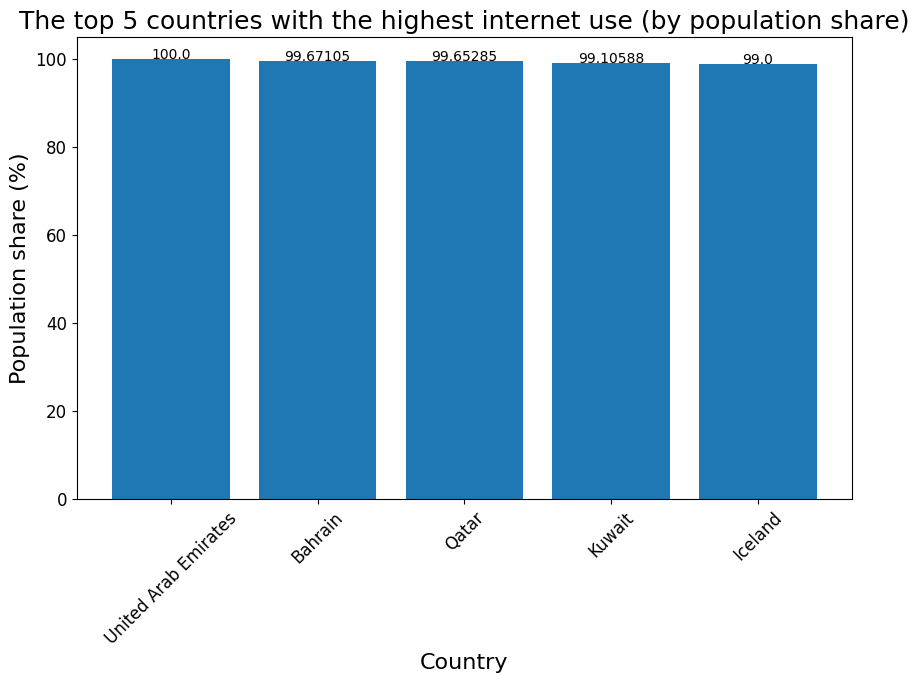

In [54]:
# Column charts: Top 5 countries with the highest internet use (2020)

import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in the 'share' column.
filtered_adoption_and_internet_users = filtered_adoption_and_internet_users.dropna(subset=['share'])

x = adoption_and_internet_users_rank_top_5['entity'].tolist() 
y = adoption_and_internet_users_rank_top_5['share'].tolist()

# Creating centrally positioned labels on the columns
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.figure(figsize=(10, 6))

plt.bar(x, y)

addlabels(x, y)

plt.xlabel('Country', fontsize=16)

plt.ylabel('Population share (%)', fontsize=16)

plt.title('The top 5 countries with the highest internet use (by population share)', fontsize=18)

plt.xticks(rotation=45, fontsize=12)

plt.yticks(fontsize=12)

plt.show()

The following table contains regionals ranking for the countries depend on the share of internet users grouped by region and ordered by descending order in the year 2020.

In [55]:
import pandas as pd

filtered_adoption_and_internet_users = filtered_adoption_and_internet_users.dropna(subset=['share']).query('year == 2020').sort_values(['region', 'RANK_region'], ascending=[True, True])

filtered_adoption_and_internet_users[['entity', 'code', 'year', 'share', 'region', 'RANK_region']]

,entity,code,year,share,region,RANK_region
5317,South Korea,KOR,2020,96.50506,East Asia & Pacific,1.0
680,Brunei,BRN,2020,95.00000,East Asia & Pacific,2.0
2505,Hong Kong,HKG,2020,92.41314,East Asia & Pacific,3.0
5166,Singapore,SGP,2020,92.00435,East Asia & Pacific,4.0
4142,New Zealand,NZL,2020,91.50000,East Asia & Pacific,5.0
...,...,...,...,...,...,...
1127,Central African Republic,CAF,2020,10.40000,Sub-Saharan Africa,32.0
1156,Chad,TCD,2020,10.40000,Sub-Saharan Africa,32.0
762,Burundi,BDI,2020,9.40000,Sub-Saharan Africa,33.0
5323,South Sudan,SSD,2020,6.50000,Sub-Saharan Africa,34.0


The barplots shows the TOP5 countries with the highest population share of internet usage grouped by regions  in the year 2020.

- The highest shares are located in the Middle East.
- Countries from the developed world (Europe and North America) have similar shares of internet usage.
- The population in countries from South Asia and Sub-Saharan Africa have lesser extent in the internet usage.

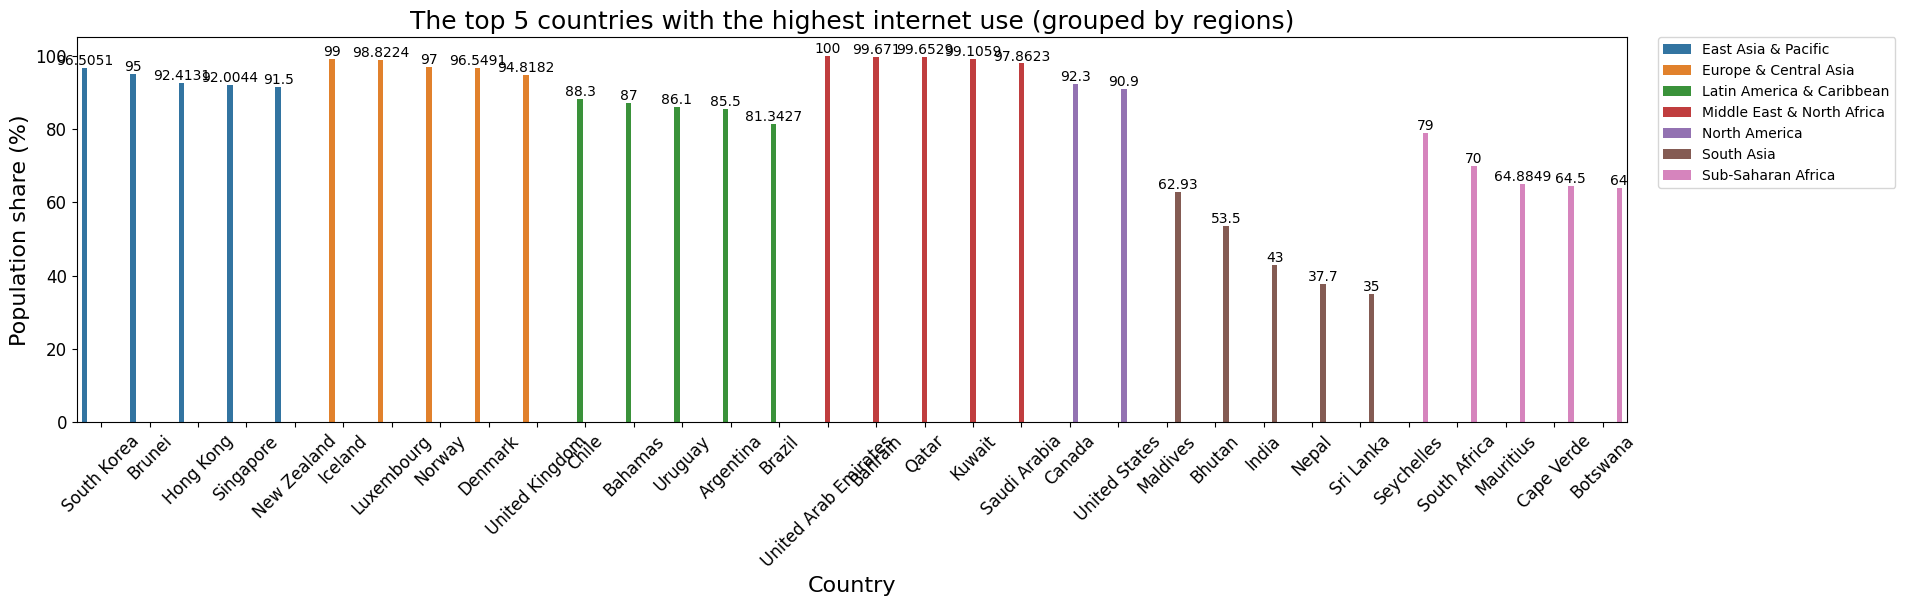

In [56]:
# Bar plot: Top 5 countries by regions

import seaborn as sns
import matplotlib.pyplot as plt

top_5_rank = [1, 2, 3, 4, 5]

filtering_for_the_top_5_by_regions = filtered_adoption_and_internet_users['RANK_region'].isin(top_5_rank)

adoption_and_internet_users_rank_top_5_by_region = filtered_adoption_and_internet_users[filtering_for_the_top_5_by_regions].query('year == 2020').sort_values(['region', 'RANK_region'], ascending = [True, True])

fig, ax = plt.subplots(figsize=(20, 5))

my_plot = sns.barplot(x='entity',
            y='share',
            hue='region',
            data=adoption_and_internet_users_rank_top_5_by_region)

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.xlabel('Country', fontsize=16)

plt.ylabel('Population share (%)', fontsize=16)

plt.title('The top 5 countries with the highest internet use (grouped by regions)', fontsize=18)

plt.xticks(fontsize=12)

plt.yticks(fontsize=12)

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

The following scatterplot display the relationship between **population share of internet usage** and **broadbent internet landline conncetion**.

The Pearson's correlation coefficient between the 2 groups is 0.78 which means a relatively strong correlation.

The diagram shows `High income` countries usually  have the highest share of people with internet landline connection, which is related to their most develeoped infrastructure.

The `Upper middle income` and `Lower middle income` countries have lesser landline connection, but their population still have usually high share of internet usage which means people tend to use internet on mobile rather than landline connection.

The correlation between internet usage and broadbent internet landline connection:  
 0.7809817969036812


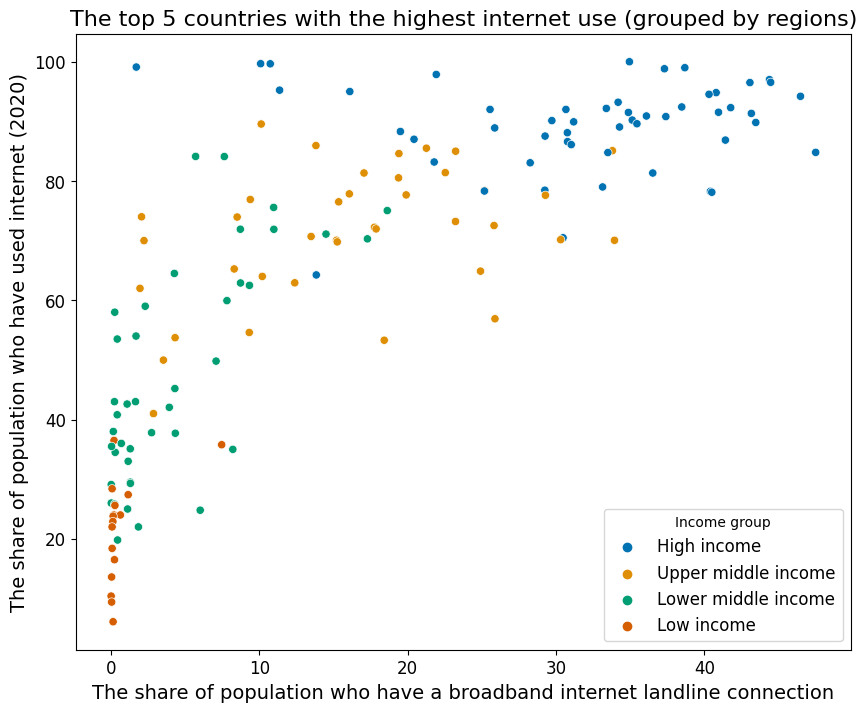

In [57]:
# Correlation between internet share and fixed broadband_subs_share

import seaborn as sns
import matplotlib.pyplot as plt

#Filter out rows with null values in the column 'fixed_broadband_subs_share' (3372 rows)
calculation_correlation_filtered_dataframe_1st = filtered_adoption_and_internet_users[~filtered_adoption_and_internet_users['fixed_broadband_subs_share'].isnull()].copy(deep=True)

calculation_correlation_filtered_dataframe_2nd = calculation_correlation_filtered_dataframe_1st[~filtered_adoption_and_internet_users['share'].isnull()].copy(deep=True)

calculation_correlation_filtered_dataframe_3rd = calculation_correlation_filtered_dataframe_2nd[calculation_correlation_filtered_dataframe_2nd['entity'] != "World"].copy(deep=True)

calculation_correlation_filtered_dataframe_4th = calculation_correlation_filtered_dataframe_3rd[calculation_correlation_filtered_dataframe_3rd['year'] == 2020].copy(deep=True)

calculation_correlation_filtered_dataframe_4th[['entity', 'code', 'year', 'fixed_broadband_subs_share', 'share']]

correlation_broadbent_subscription_share = calculation_correlation_filtered_dataframe_4th['fixed_broadband_subs_share']

correlation_internet_usage_share = calculation_correlation_filtered_dataframe_4th['share']

print("The correlation between internet usage and broadbent internet landline connection: ","\n",  correlation_broadbent_subscription_share.corr(correlation_internet_usage_share))

plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=calculation_correlation_filtered_dataframe_4th,
    x='fixed_broadband_subs_share',
    y='share',
    hue='income_group',
    palette='colorblind')

plt.xlabel("The share of population who have a broadband internet landline connection", fontsize=14)
plt.ylabel('The share of population who have used internet (2020)', fontsize=14)
plt.title('The top 5 countries with the highest internet use (grouped by regions)', fontsize=16)
plt.legend(title='Income group', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Based on visual inspection of the previous scatterplot, it can be observed that linear regression may not necessarily be applicable to the data; thus, the application of Pearson correlation is not appropriate.

Below, I have fitted several polynomial regression models to the data and visualize the curve of each model in the same plot:

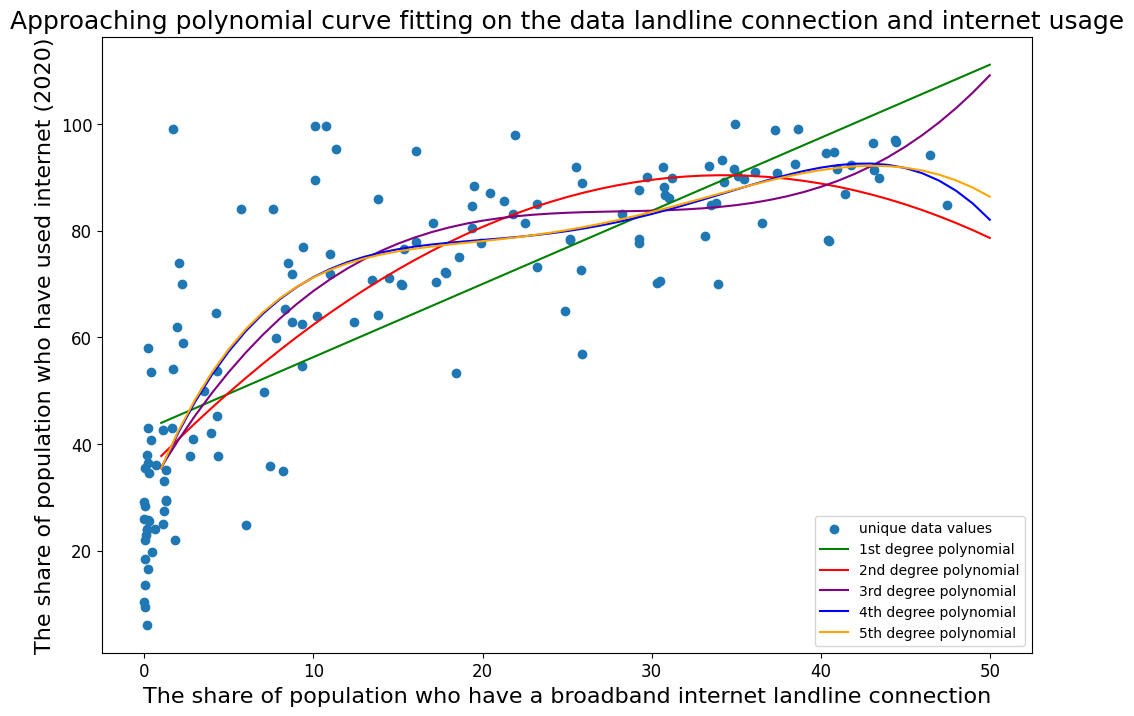

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Fit polynomial models from 1 to 5 degree.
model1 = np.poly1d(np.polyfit(calculation_correlation_filtered_dataframe_4th['fixed_broadband_subs_share'], calculation_correlation_filtered_dataframe_4th['share'], 1))
model2 = np.poly1d(np.polyfit(calculation_correlation_filtered_dataframe_4th['fixed_broadband_subs_share'], calculation_correlation_filtered_dataframe_4th['share'], 2))
model3 = np.poly1d(np.polyfit(calculation_correlation_filtered_dataframe_4th['fixed_broadband_subs_share'], calculation_correlation_filtered_dataframe_4th['share'], 3))
model4 = np.poly1d(np.polyfit(calculation_correlation_filtered_dataframe_4th['fixed_broadband_subs_share'], calculation_correlation_filtered_dataframe_4th['share'], 4))
model5 = np.poly1d(np.polyfit(calculation_correlation_filtered_dataframe_4th['fixed_broadband_subs_share'], calculation_correlation_filtered_dataframe_4th['share'], 5))

# Create a scatterplot
polyline = np.linspace(1, 50, 50)
plt.figure(figsize=(12, 8))
plt.scatter(calculation_correlation_filtered_dataframe_4th['fixed_broadband_subs_share'], calculation_correlation_filtered_dataframe_4th['share'])

# Add fitted polynomial lines to scatterplot 
plt.plot(polyline, model1(polyline), color='green')
plt.plot(polyline, model2(polyline), color='red')
plt.plot(polyline, model3(polyline), color='purple')
plt.plot(polyline, model4(polyline), color='blue')
plt.plot(polyline, model5(polyline), color='orange')

plt.legend(['unique data values', '1st degree polynomial', '2nd degree polynomial', '3rd degree polynomial', '4th degree polynomial', '5th degree polynomial'], loc ="lower right") 

plt.xlabel("The share of population who have a broadband internet landline connection", fontsize=16)
plt.ylabel('The share of population who have used internet (2020)', fontsize=16)
plt.title('Approaching polynomial curve fitting on the data landline connection and internet usage', fontsize=18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

To assess which curve fits the data best, the determination of the adjusted R-squared values are necessary for the models.

This value indicates the percentage of the variation in the response variable that can be explained by the predictor variables in the model, adjusted for the number of predictor variables.

In [59]:
#Define function to calculate adjusted r-squared
def adjusted_r_sqr(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results[f'r_squared_degree_{degree}'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

#Calculated adjusted R-squared of each model
print(adjusted_r_sqr(calculation_correlation_filtered_dataframe_4th['fixed_broadband_subs_share'], calculation_correlation_filtered_dataframe_4th['share'], 1))
print(adjusted_r_sqr(calculation_correlation_filtered_dataframe_4th['fixed_broadband_subs_share'], calculation_correlation_filtered_dataframe_4th['share'], 2))
print(adjusted_r_sqr(calculation_correlation_filtered_dataframe_4th['fixed_broadband_subs_share'], calculation_correlation_filtered_dataframe_4th['share'], 3))
print(adjusted_r_sqr(calculation_correlation_filtered_dataframe_4th['fixed_broadband_subs_share'], calculation_correlation_filtered_dataframe_4th['share'], 4))
print(adjusted_r_sqr(calculation_correlation_filtered_dataframe_4th['fixed_broadband_subs_share'], calculation_correlation_filtered_dataframe_4th['share'], 5))

{'r_squared_degree_1': 0.6072424468679698}
{'r_squared_degree_2': 0.7049734826810118}
{'r_squared_degree_3': 0.7381381694918328}
{'r_squared_degree_4': 0.7487746618263733}
{'r_squared_degree_5': 0.7471447867796267}


Based on the calculations, it is evident that the model with the highest adjusted R-squared is the fourth-degree polynomial.

However, since this value is still relatively far from 1.0, it can be concluded that this model describes a **moderately strong relationship** among the data points.

The equation of 4th grade polynomial curve:  
             4           3          2
-0.0001179 x + 0.01279 x - 0.4832 x + 8.011 x + 27.88


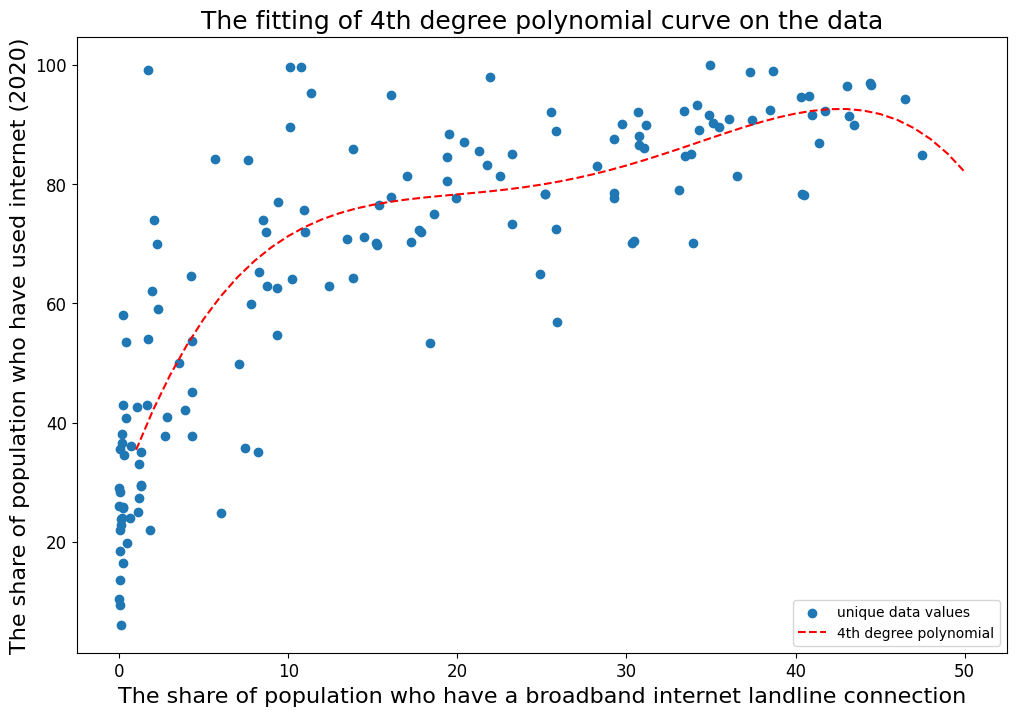

In [60]:
#Fit fourth-degree polynomial
model4 = np.poly1d(np.polyfit(calculation_correlation_filtered_dataframe_4th['fixed_broadband_subs_share'], calculation_correlation_filtered_dataframe_4th['share'], 4))

print("The equation of 4th grade polynomial curve: ","\n", model4)

#Define scatterplot
polyline = np.linspace(1, 50, 50)
plt.figure(figsize=(12, 8))
plt.scatter(calculation_correlation_filtered_dataframe_4th['fixed_broadband_subs_share'], calculation_correlation_filtered_dataframe_4th['share'])

#Add fitted polynomial curve to scatterplot
plt.plot(polyline, model4(polyline), '--', color='red')

plt.xlabel("The share of population who have a broadband internet landline connection", fontsize=16)
plt.ylabel("The share of population who have used internet (2020)", fontsize=16)
plt.title("The fitting of 4th degree polynomial curve on the data", fontsize=18)

plt.legend(['unique data values', '4th degree polynomial'], loc ="lower right")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### 🔍 **Scenario: Identify emerging markets for a global internet provider**

This scenario helps you develop an end-to-end project for your portfolio.

Background: You work for a global internet provider on a mission to provide affordable Internet access to everybody around the world using satellites. You are tasked with identifying which markets (regions or countries) are most worthwhile to focus efforts on.

**Objective**: Construct a top 5 list of countries where there is a big opportunity to roll out our services. Try to consider the amount of people not having access to (good) wired or mobile internet and their spending power.

In order to identify countries worth focusing on as a global internet provider, _I first examined the highest-income countries falling into the 'high income' category in the 'income_group' column_.

To achieve this, I created the `people_without_internet_usage` column to calculate the number of people who did not use the internet during the studied period. Based on the obtained values, I established a ranking in the `RANK_people_without_internet` column, arranging the values in descending order.

The table below presents the ranked values, ranging from 1 to 52.

In [61]:
filtered_adoption_and_internet_users[(filtered_adoption_and_internet_users['year'] == 2020) & (filtered_adoption_and_internet_users['income_group'] == "High income")].sort_values(by=['income_group', 'RANK_people_without_internet'], ascending=[True, True])

,entity,code,year,fixed_telephone_subs,fixed_telephone_subs_share,fixed_broadband_subs,fixed_broadband_subs_share,mobile_cell_subs,mobile_cell_subs_share,users,share,RANK_country,region,income_group,RANK_region,people_without_internet_usage,RANK_people_without_internet,difference_between_mobile_subscribers_internet_users_million,RANK_mobile_subscribers_internet_users
5874,United States,USA,2020,101799000.0,30.302551,121232000.0,36.087180,352522000.0,104.935370,305371298,90.900000,25.0,North America,High income,2.0,30570724.0,1.0,47.150702,2.0
2738,Italy,ITA,2020,19607340.0,32.953194,18128788.0,30.468252,77581050.0,130.387050,41938046,70.483430,80.0,Europe & Central Asia,High income,43.0,17562529.0,2.0,35.643004,3.0
2791,Japan,JPN,2020,61978590.0,49.485977,44000790.0,35.131840,195054900.0,155.738970,112995146,90.219460,27.0,East Asia & Pacific,High income,6.0,12249614.0,3.0,82.059754,1.0
2064,France,FRA,2020,37759000.0,58.559196,30627000.0,47.498410,72751000.0,112.827140,54679086,84.800000,46.0,Europe & Central Asia,High income,23.0,9800968.0,4.0,18.071914,6.0
2184,Germany,DEU,2020,38400000.0,46.082400,36215304.0,43.460630,107400000.0,128.886720,74840220,89.812940,30.0,Europe & Central Asia,High income,15.0,8488775.0,5.0,32.559780,4.0
4512,Poland,POL,2020,5777428.0,15.034280,8369218.0,21.778751,49350724.0,128.422640,31966596,83.184890,51.0,Europe & Central Asia,High income,26.0,6461772.0,6.0,17.384128,7.0
4621,Romania,ROU,2020,3025000.0,15.559069,5684782.0,29.239641,22588000.0,116.181240,15253305,78.455270,58.0,Europe & Central Asia,High income,30.0,4188735.0,7.0,7.334695,14.0
5845,United Kingdom,GBR,2020,32730000.0,48.807423,27352000.0,40.787674,79007000.0,117.816315,63584584,94.818200,13.0,Europe & Central Asia,High income,5.0,3474888.0,8.0,15.422416,8.0
5349,Spain,ESP,2020,19455658.0,41.077057,16188502.0,34.179054,55647704.0,117.489930,44145745,93.205650,16.0,Europe & Central Asia,High income,8.0,3218063.0,9.0,11.501959,10.0
1058,Canada,CAN,2020,13340000.0,35.208380,15825813.0,41.769210,32360144.0,85.408420,36740677,92.300000,18.0,North America,High income,1.0,3065040.0,10.0,-4.380533,52.0


I have depicted the data for the TOP 5 countries with the highest number of people not using the internet in the following bar chart.

Since these countries fall into the category of high-income nations, it is worthwhile to target the population in these countries who do not use the internet in order to provide them with internet access.

However, it is worthwhile to examine other larger-population countries where the number of people not using the internet is significant.

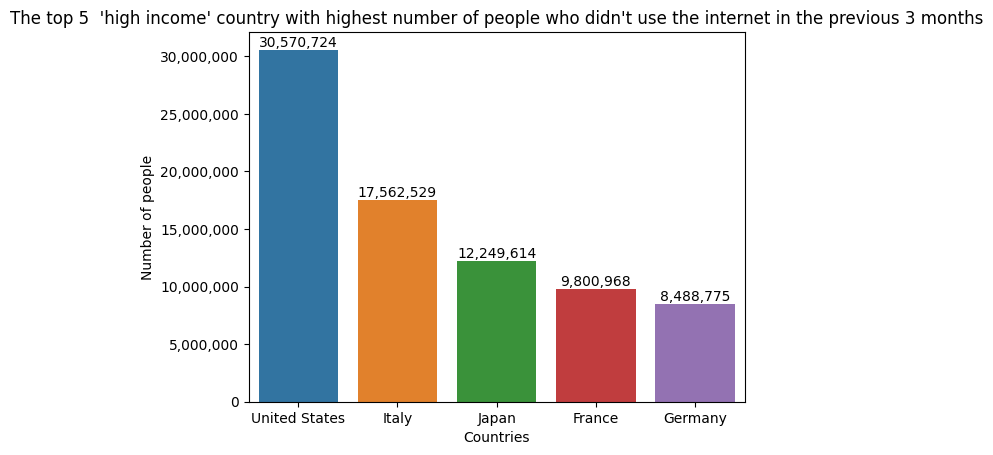

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_5_rank = [1, 2, 3, 4, 5]

scenario_auxiliary_table.sort_values('RANK_people_without_internet', ascending=True, inplace=True)

scenario_auxiliary_table_top_5_rank = scenario_auxiliary_table['RANK_people_without_internet'].isin(top_5_rank)

egyeb = scenario_auxiliary_table[scenario_auxiliary_table_top_5_rank]

ax = sns.barplot(
    data=egyeb,
    x="entity",
    y="people_without_internet_usage",
    estimator=sum,
    ci=None, 
    errwidth=0,
)

# List comprehension to format each value as a string with commas as thousands separators and no decimal places
for c in ax.containers:
    ax.bar_label(c, labels=[f'{x:,.0f}' for x in c.datavalues])

ax.set(xlabel='Countries',
       ylabel='Number of people',
      title="The top 5  'high income' country with highest number of people who didn't use the internet in the previous 3 months" ) 

# Get the current tick positions on the y-axis
current_values = plt.gca().get_yticks()

# Sets the labels of the y-axis ticks to be formatted versions of the `current_values`, using commas as thousands separators and no decimal places.
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

In the next step, I conducted a global analysis to identify countries where there may still be a market for internet services. As evident from the previous scatterplots, in **upper middle income** and **lower middle income** countries, internet usage is relatively high, but the broadband internet landline connection rate is low. Therefore, I examined which countries exhibit the largest gap between mobile phone subscriptions and internet usage (column: `difference_between_mobile_subscribers_internet_users_million`).

The following chart displays the top 5 countries among various 'income group' classifications with the highest population differences, expressed in millions of people (column: `RANK_mobile_subscribers_internet_users`).

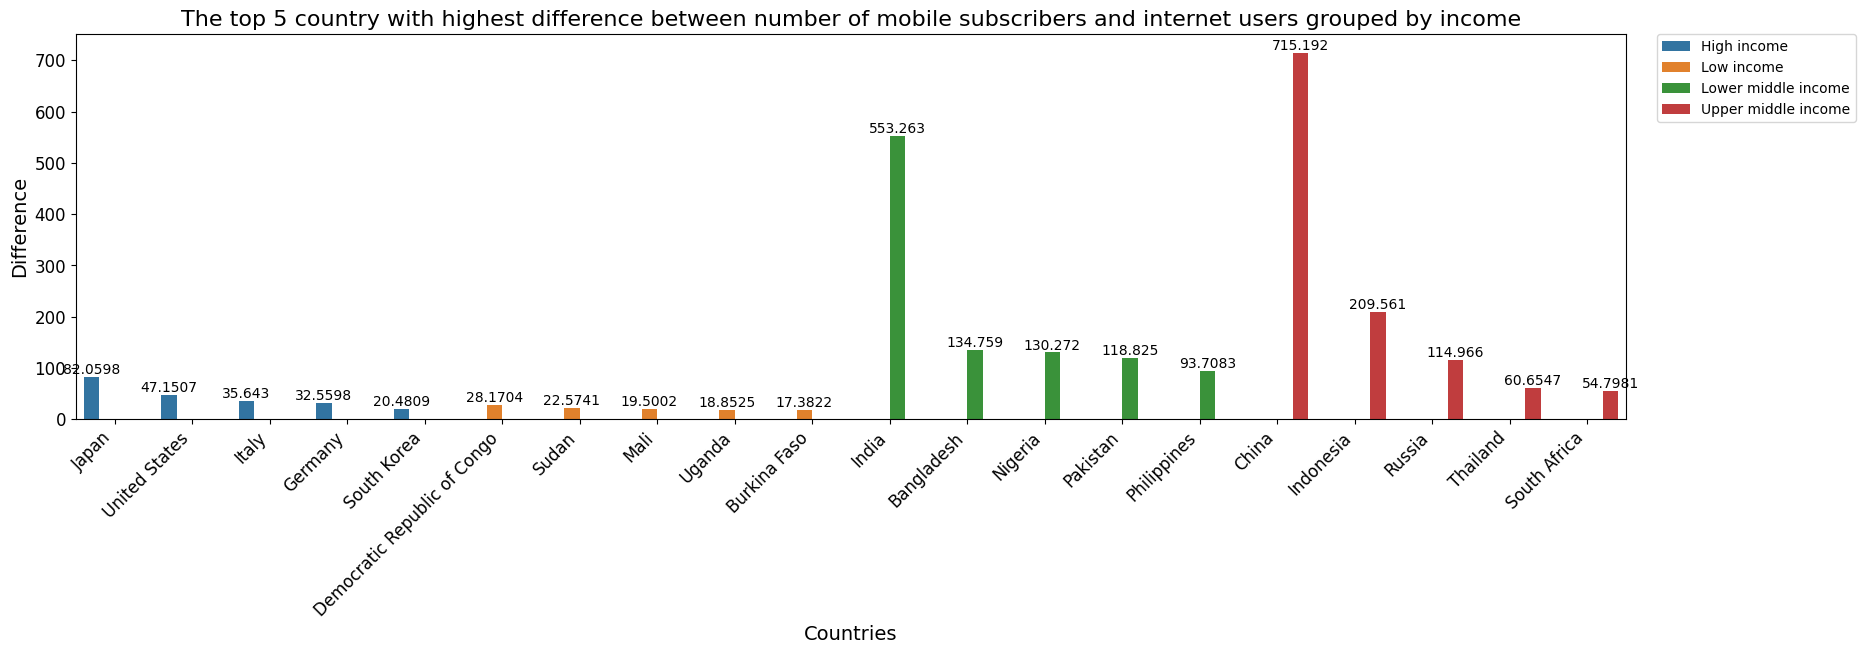

SUM Top5 countries population differences:  1743.048 million people


In [63]:
# Bar plot: Top 5 countries with largest difference between mobile subscribers and internet users  grouped by income categories

import seaborn as sns
import matplotlib.pyplot as plt


top_5_rank = [1, 2, 3, 4, 5]

filtering_top_5_country_diff_mobile_internet_usage = filtered_adoption_and_internet_users['RANK_mobile_subscribers_internet_users'].isin(top_5_rank)

top_5_country_diff_mobile_internet_usage = filtered_adoption_and_internet_users[filtering_top_5_country_diff_mobile_internet_usage].query('year == 2020').sort_values(['income_group', 'RANK_mobile_subscribers_internet_users'], ascending = [True, True])

fig, ax = plt.subplots(figsize=(20, 5))

my_plot = sns.barplot(x='entity',
            y='difference_between_mobile_subscribers_internet_users_million',
            hue='income_group',
            data=top_5_country_diff_mobile_internet_usage
)

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

for container in ax.containers:
    ax.bar_label(container)
    
for label in ax.get_xticklabels():
    label.set_horizontalalignment('right')

ax.set_xlabel('Countries', fontsize=14)
ax.set_ylabel('Difference', fontsize=14)
ax.set_title("The top 5 country with highest difference between number of mobile subscribers and internet users grouped by income", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# Filter Rows Based on List of Values
TOP_5_values_countries = ["India", "Bangladesh", "Nigeria", "China", "Indonesia"]

print(
    "SUM Top5 countries population differences: ",
    round(top_5_country_diff_mobile_internet_usage[top_5_country_diff_mobile_internet_usage["entity"].isin(TOP_5_values_countries)]["difference_between_mobile_subscribers_internet_users_million"].sum(), 3),
    "million people"
)

As clearly indicated in the chart, the most significant disparity exists in the countries:
- China,
- India,
- Indonesia,
- Bangladesh,
- Nigeria

In these TOP 5 countries, there is a  surplus of 1743.048 million more mobile subscribers than internet users, which presents a potential market opportunity in the mobile internet service sector. When making business decisions, it is imperative to consider the acquisition of market share in these countries and, owing to the economic status of these nations, to target cost-effective mobile internet advertising towards those mobile subscribers who do not use the internet.

## Summary

- The highest rates of internet usage are found in the Near Eastern states, followed by generally highly developed European and North American countries. Lastly, South Asia and sub-Saharan Africa.
- Broadband internet landline connections are most extensively established in high-income countries, while there is a significant variance in upper middle income and lower middle income nations.
- Considering the scenario of using satellite technology to provide internet access to people, I also examined upper middle income and lower middle income countries to assess the gap between mobile subscriptions and internet usage.
- Assuming that those with mobile subscriptions can afford affordable mobile internet access, I identified the following 5 countries with the most substantial numerical disparities for gaining market share in the mobile internet sector:
    - China,
    - India,
    - Indonesia,
    - Bangladesh,
    - Nigeria.